# Rainfall Weather Forecasting

## Importing library

In [122]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df1= pd.read_csv("Rainfall.csv")

In [13]:
df1.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [14]:
df1.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [16]:
df1.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [17]:
df1.duplicated().sum()

1663

In [18]:
df1.shape

(8425, 23)

In [10]:
df= df.drop_duplicates()

In [19]:
df.shape

(6762, 23)

In [21]:
df['Location'].value_counts()

Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm     

In [24]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6692.000000  6705.000000  6624.000000  3841.000000  3526.000000   
mean     13.109145    24.098345     2.780148     5.302395     7.890896   
std       5.569574     6.156128    10.591418     4.436790     3.785883   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.500000     0.000000     2.600000     5.400000   
50%      13.200000    23.500000     0.000000     4.600000     9.000000   
75%      17.500000    28.400000     0.800000     7.000000    10.800000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    5820.000000   6699.000000   6662.000000  6708.000000  6666.000000   
mean       38.977663     12.782206     17.571150    67.506559    50.467147   
std        14.418577      9.833499      9.620043    17.251733    18.631086   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000      9.000000    56.000000    38.000000   
50%        37.000000     11.000000     17.000000    68.000000    50.000000   
75%        48.000000     19.000000     24.000000    81.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  5454.000000  5451.000000  4896.000000  4860.000000  6711.000000   
mean   1017.626311  1015.119923     4.336806     4.320988    17.895038   
std       6.712043     6.646755     2.908324     2.740519     5.744117   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.100000  1010.300000     1.000000     1.000000    13.800000   
50%    1017.600000  1015.100000     5.000000     5.000000    18.000000   
75%    1022.200000  1019.600000     7.000000     7.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  6670.000000  
mean     22.708561  
std       6.012896  
min       7.300000  
25%      18.300000  
50%      22.100000  
75%      26.800000  
max      44.100000

In [28]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [30]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[6762 rows x 23 columns]

In [31]:
df.Date.unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2013-06-06',
       '2013-06-07', '2013-06-08'], dtype=object)

# Data Visualization

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

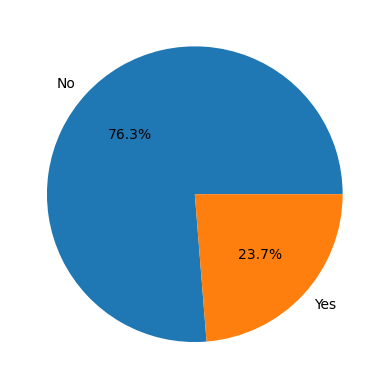

In [40]:
plt.pie(df['RainToday'].value_counts().values,labels = df['RainToday'].value_counts().index,autopct='%1.1f%%')
plt.show()

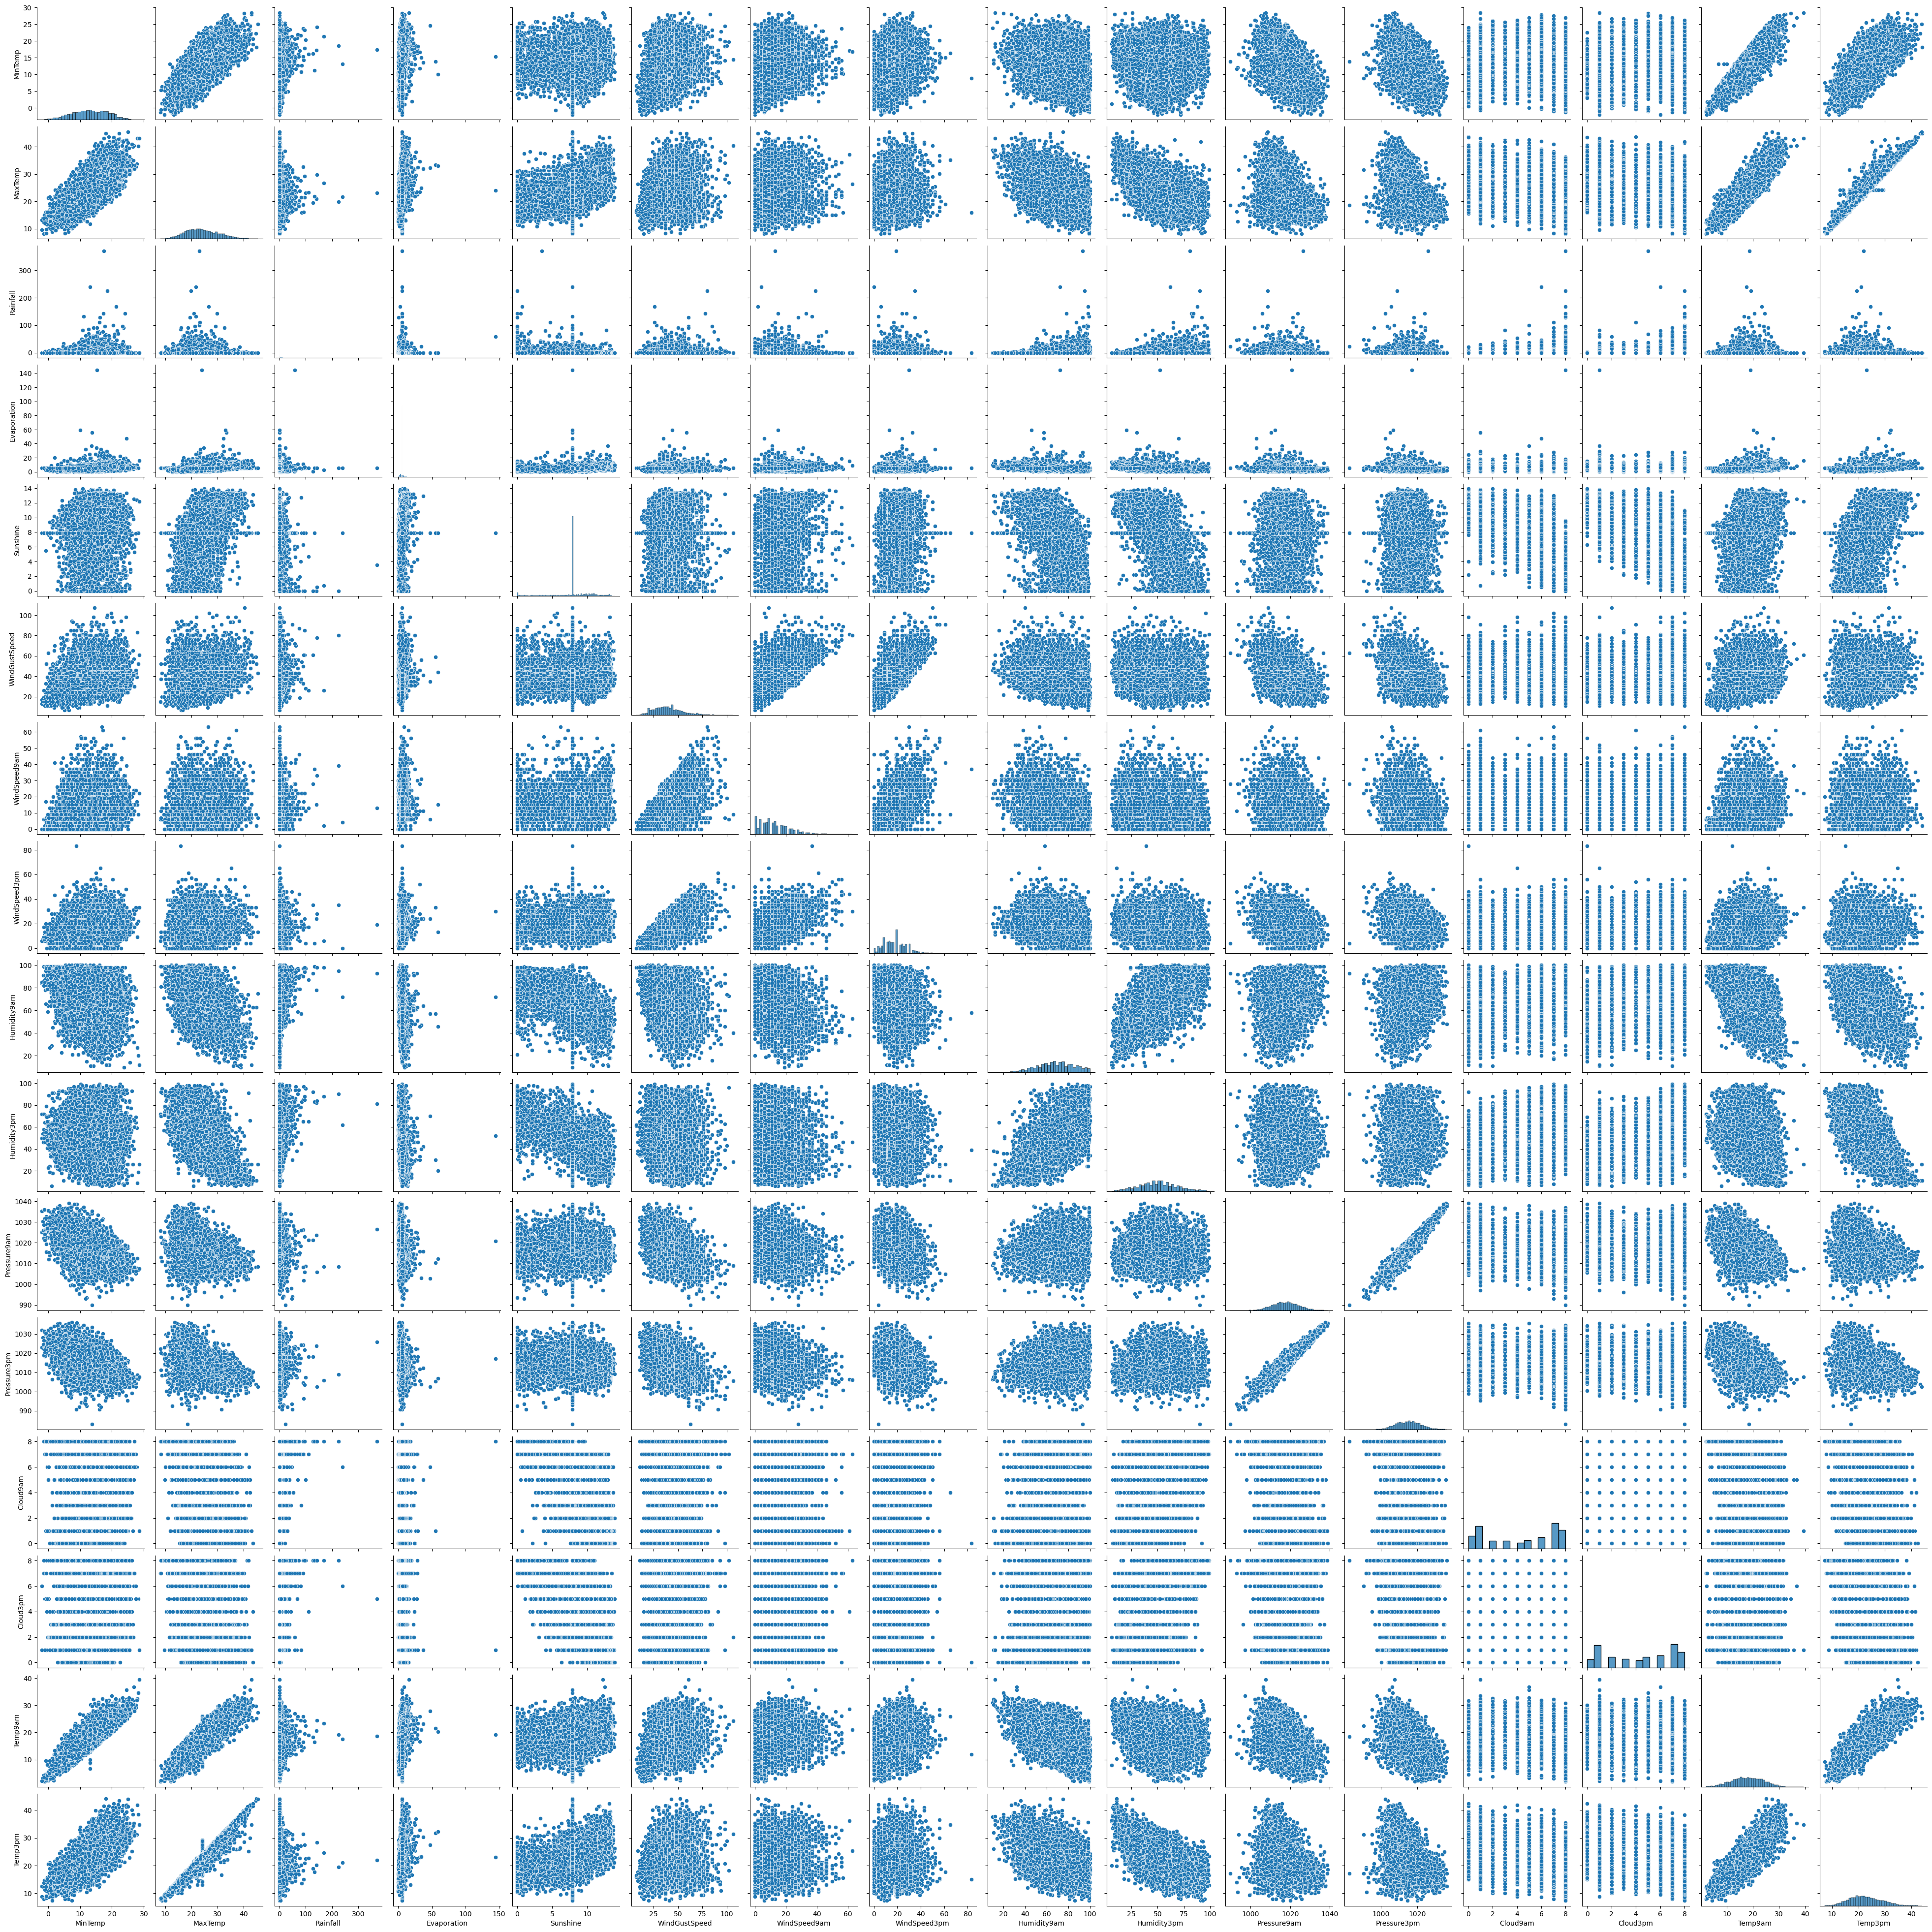

In [59]:
sns.pairplot(df)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

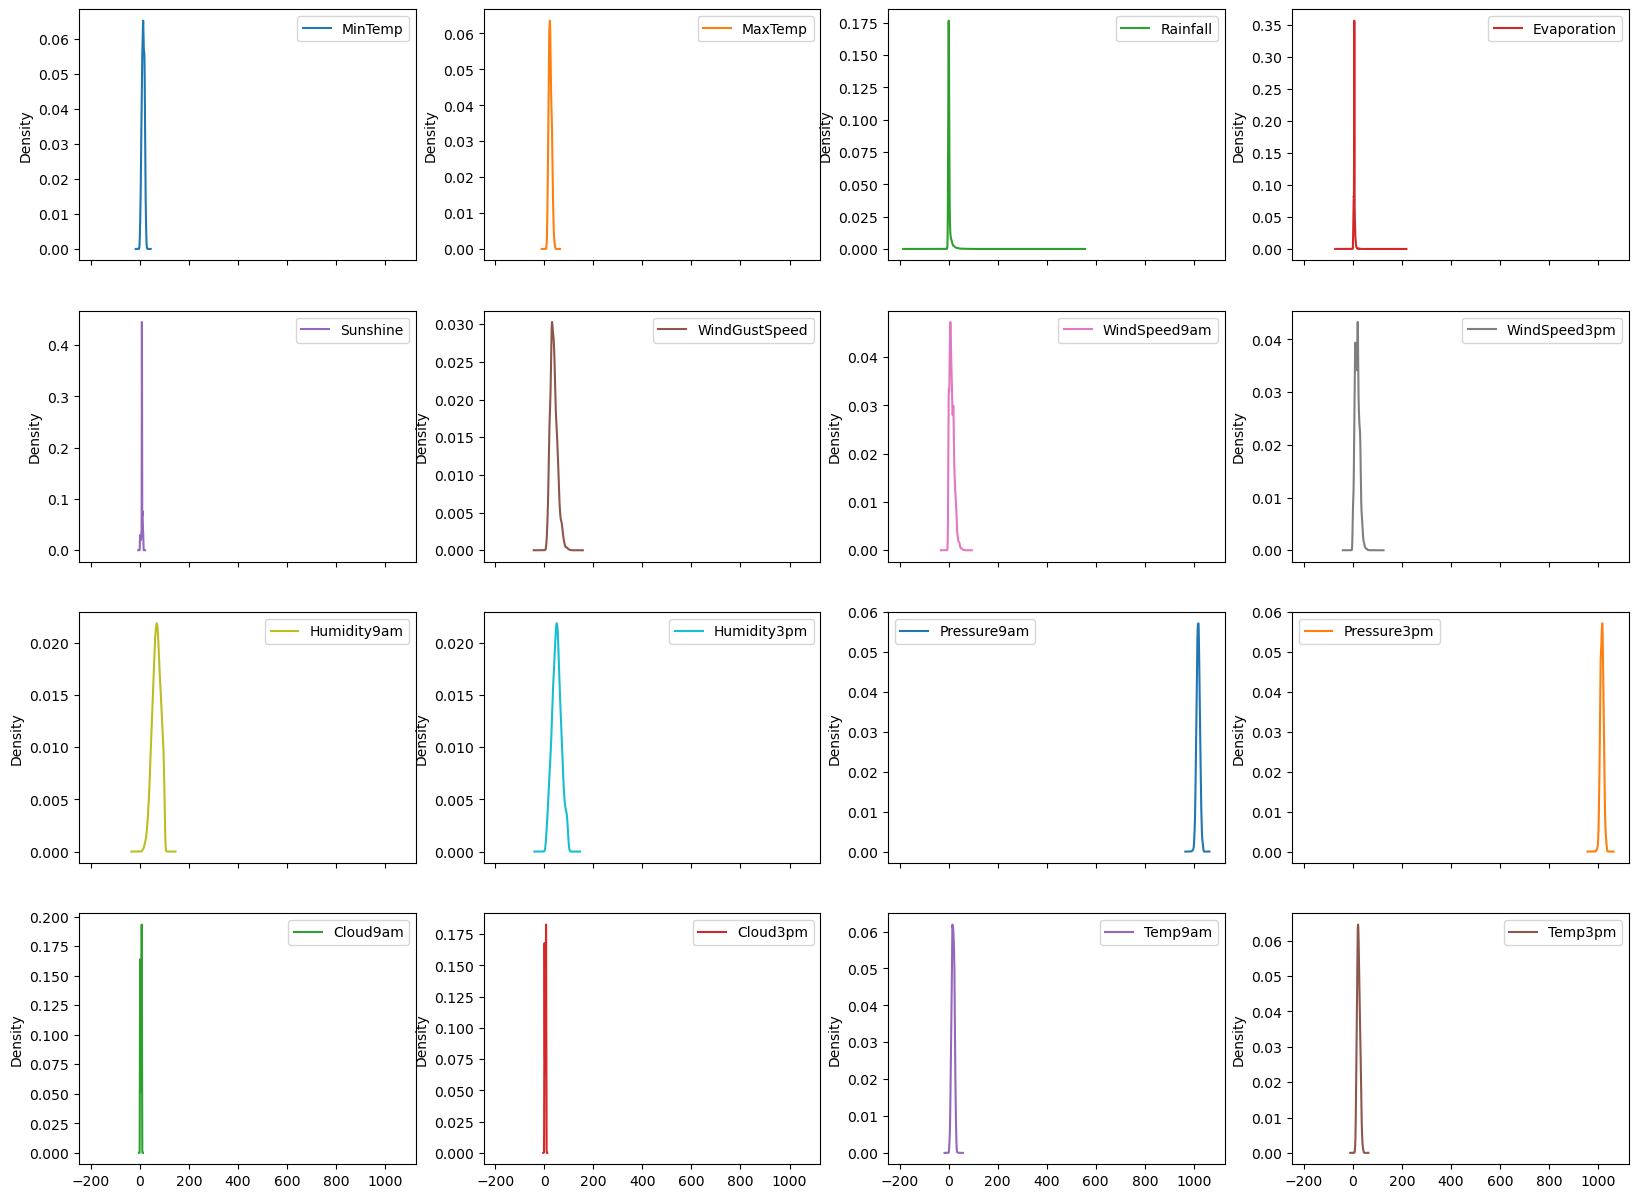

In [65]:
df.plot(kind="kde", subplots=True, layout=(4, 4), figsize=(20, 15))

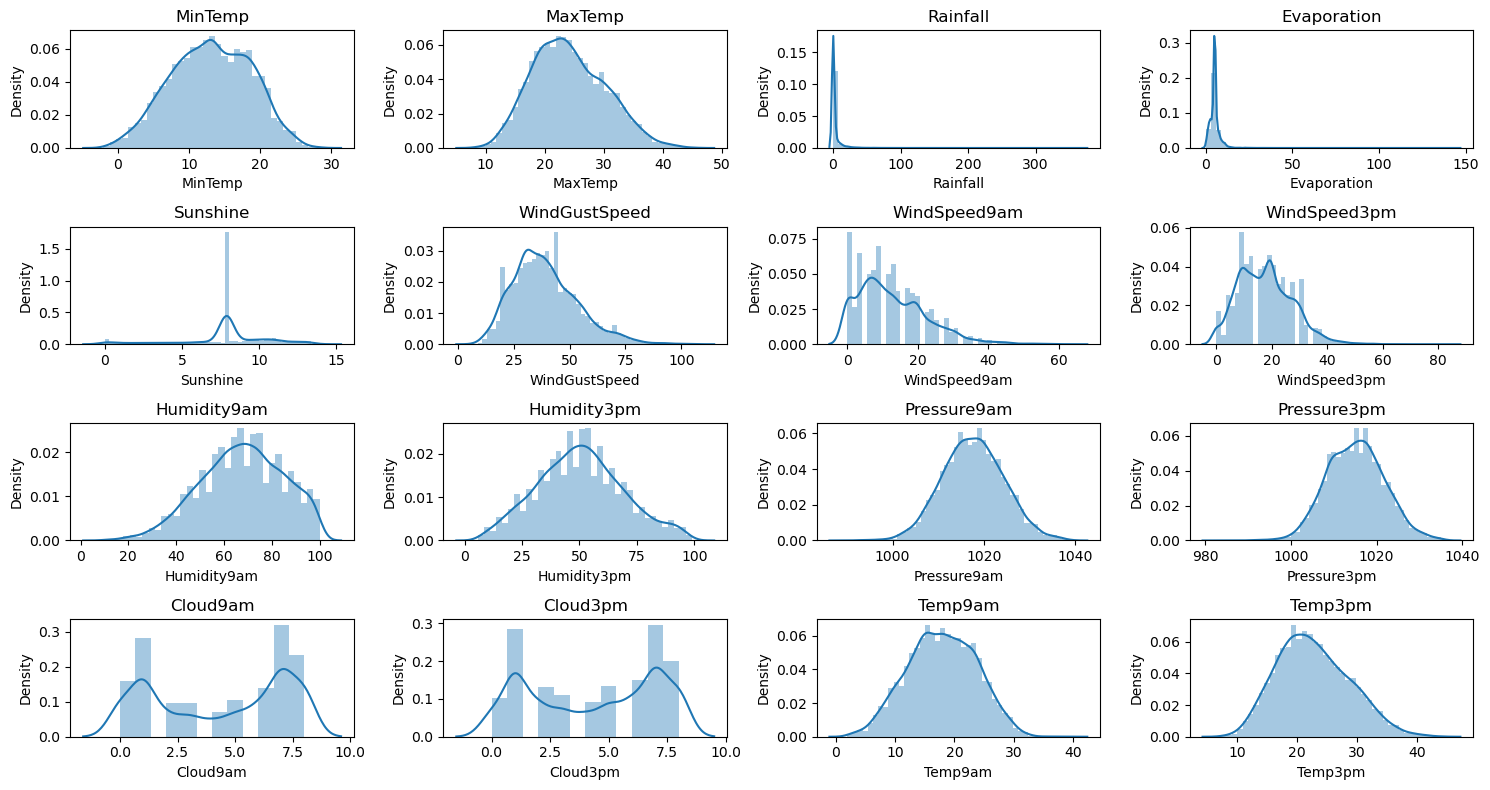

In [67]:
plt.subplots(figsize=(15, 8))

for i, col in enumerate(features):
    plt.subplot(4, 4, i + 1) 
    sns.distplot(df[col].dropna())
    plt.title(col)
    plt.tight_layout()

plt.show()

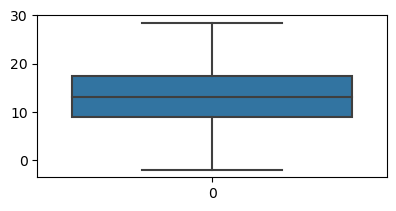

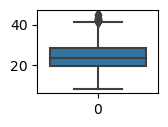

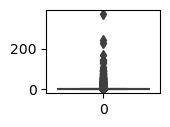

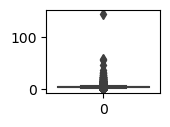

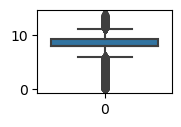

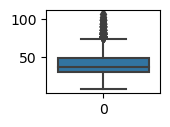

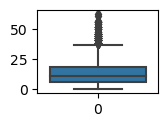

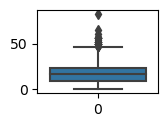

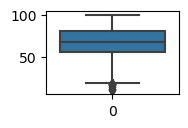

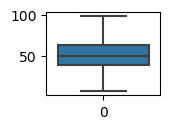

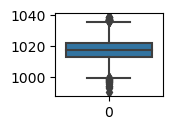

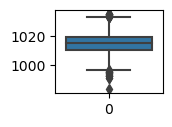

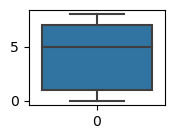

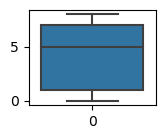

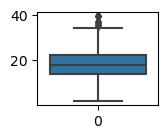

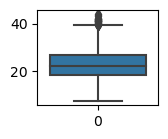

In [72]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
    plt.subplot(4,4, i + 1)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()


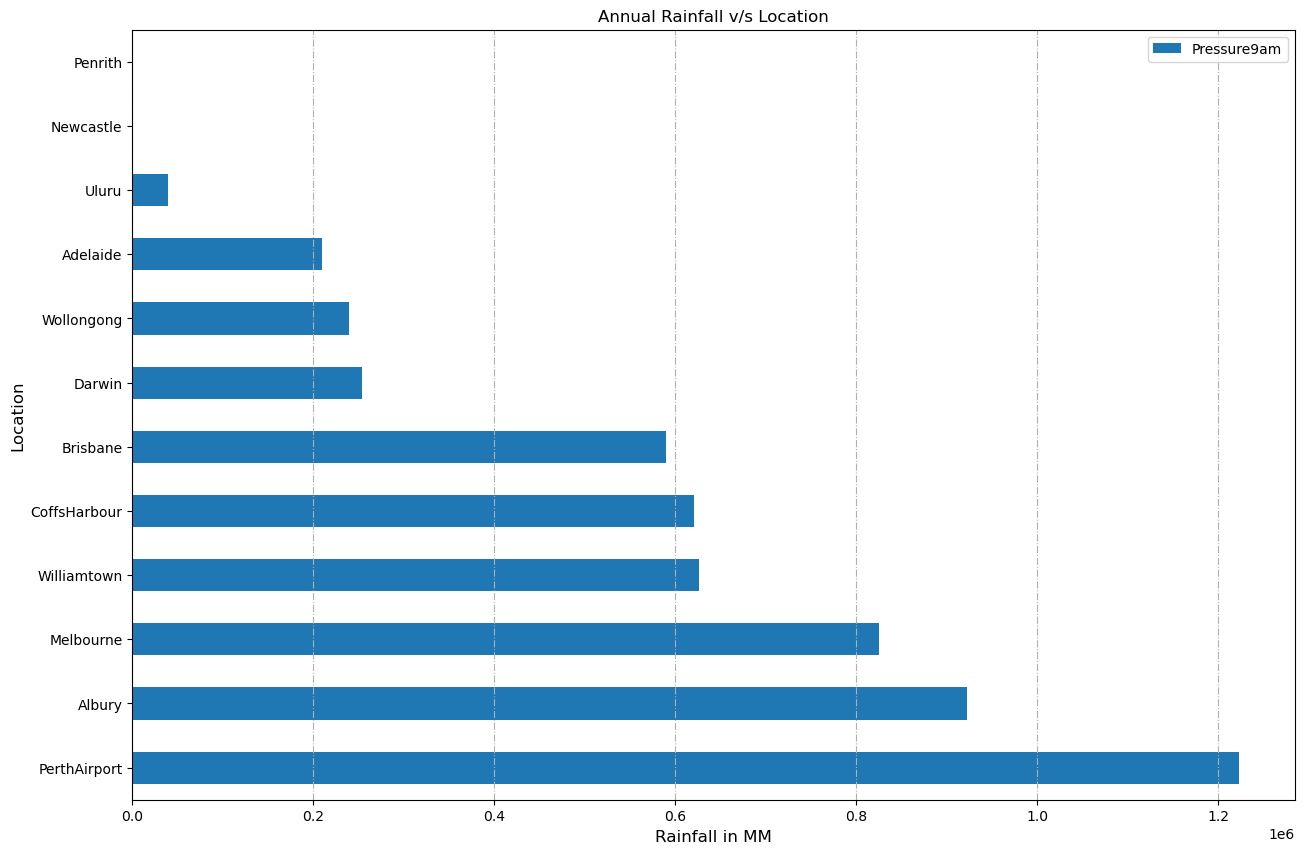

In [75]:
df[["Location","Pressure9am"]].groupby("Location").sum().sort_values(by='Pressure9am',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Location",size=12)
plt.title("Annual Rainfall v/s Location")
plt.grid(axis="x",linestyle="-.")
plt.show()

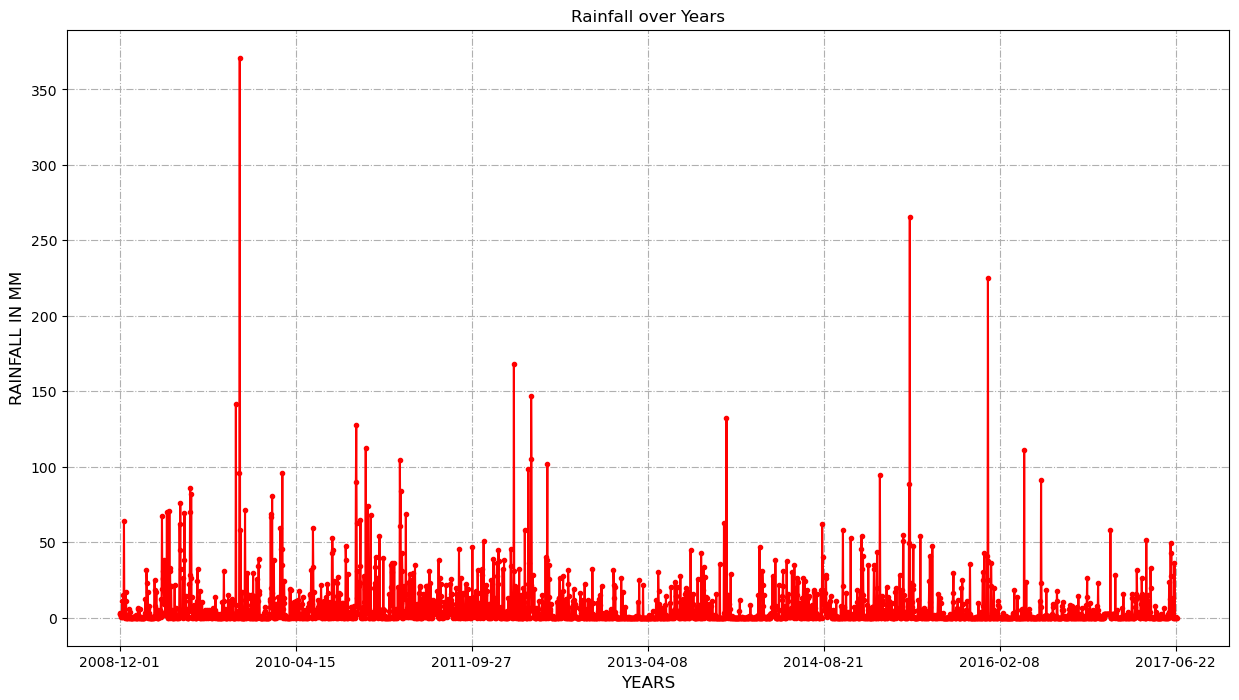

In [80]:
plt.figure(figsize=(15,8))
df.groupby("Date").sum()['Rainfall'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

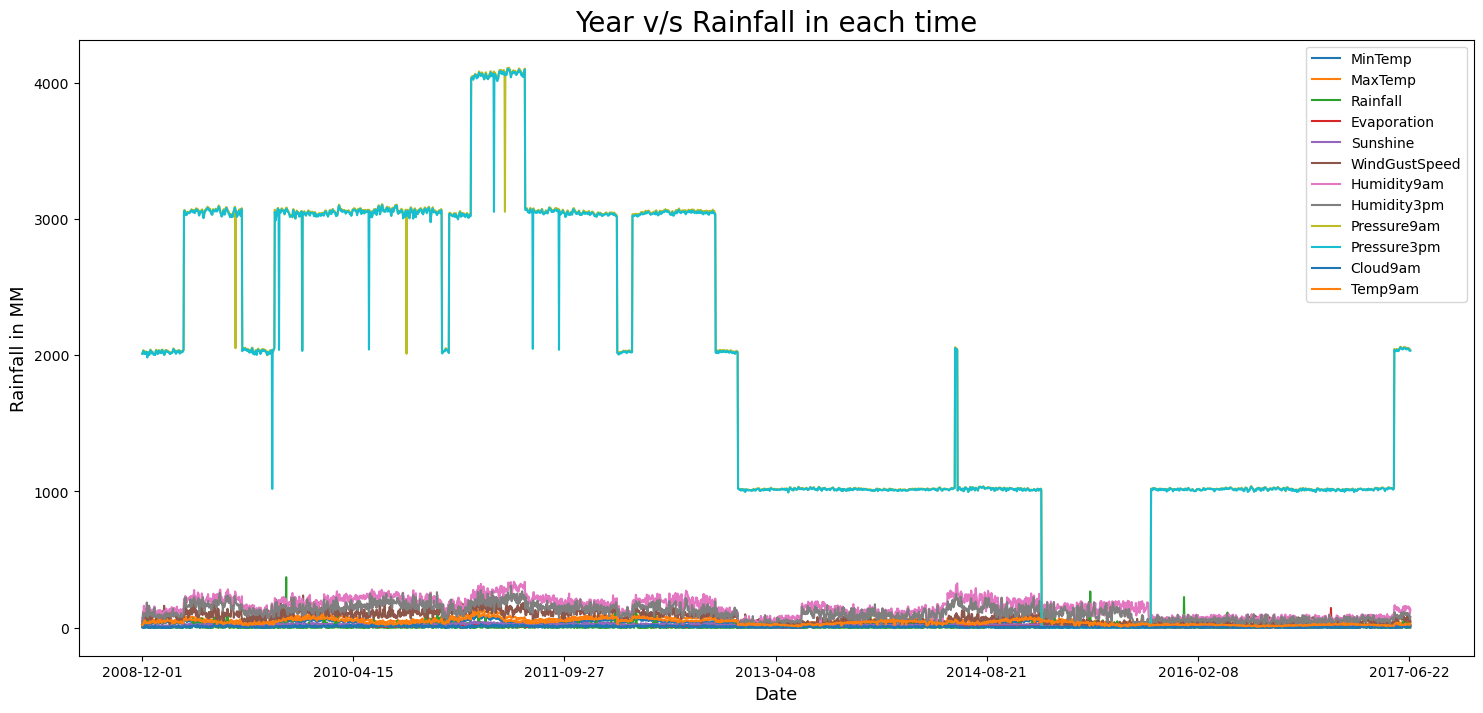

In [82]:
df[['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am','Humidity3pm', 'Pressure9am',
      'Pressure3pm', 'Cloud9am', 'Temp9am']].groupby("Date").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Date",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each time",size=20)
plt.show()

In [85]:
# Analysis of rainfall data of Uluru
TN = df.loc[((df['Location'] == 'Uluru'))]
TN.head(4)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8386  2017-05-18    Uluru      4.7     22.1       0.0     5.302395  7.890896   
8387  2017-05-19    Uluru      4.3     22.4       0.0     5.302395  7.890896   
8388  2017-05-20    Uluru      4.1     26.0       0.0     5.302395  7.890896   
8389  2017-05-21    Uluru      7.2     29.4       0.0     5.302395  7.890896   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8386           S           28.0          S  ...        68.0         33.0   
8387         ENE           26.0        NaN  ...        71.0         33.0   
8388          NW           26.0         SE  ...        60.0         22.0   
8389         NNW           44.0        ESE  ...        46.0         20.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8386       1019.0       1016.1       NaN       NaN     12.0     21.7   
8387       1020.1       1014.8       NaN       NaN     10.9     21.3   
8388       1016.7       1012.8       NaN       NaN     12.3     25.2   
8389       1015.3       1011.5       NaN       NaN     14.5     28.8   

      RainToday  RainTomorrow  
8386         No            No  
8387         No            No  
8388         No            No  
8389         No            No  

[4 rows x 23 columns]

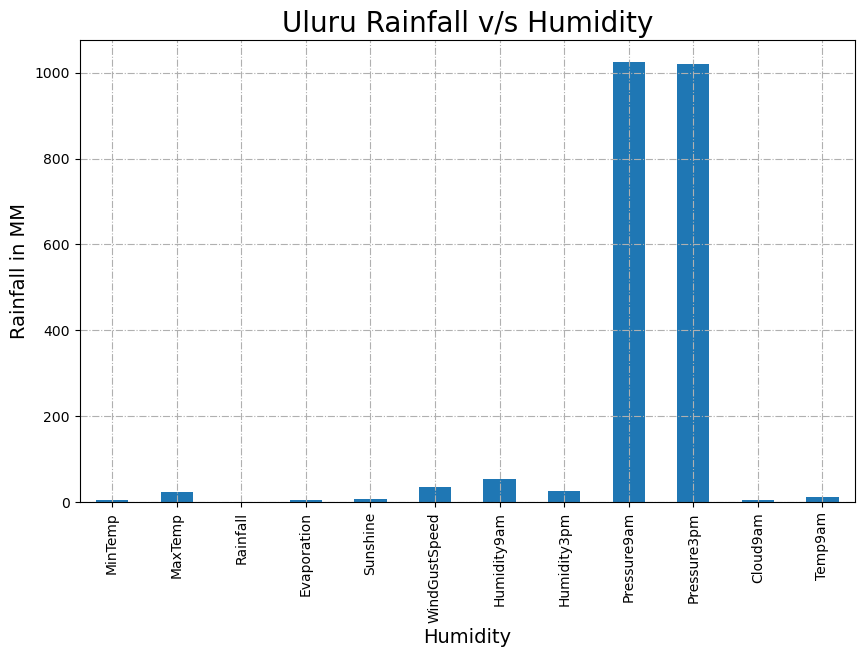

In [89]:
plt.figure(figsize=(10,6))
TN[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am','Humidity3pm', 'Pressure9am',
      'Pressure3pm', 'Cloud9am', 'Temp9am']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Uluru Rainfall v/s Humidity",size=20)
plt.xlabel("Humidity",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()


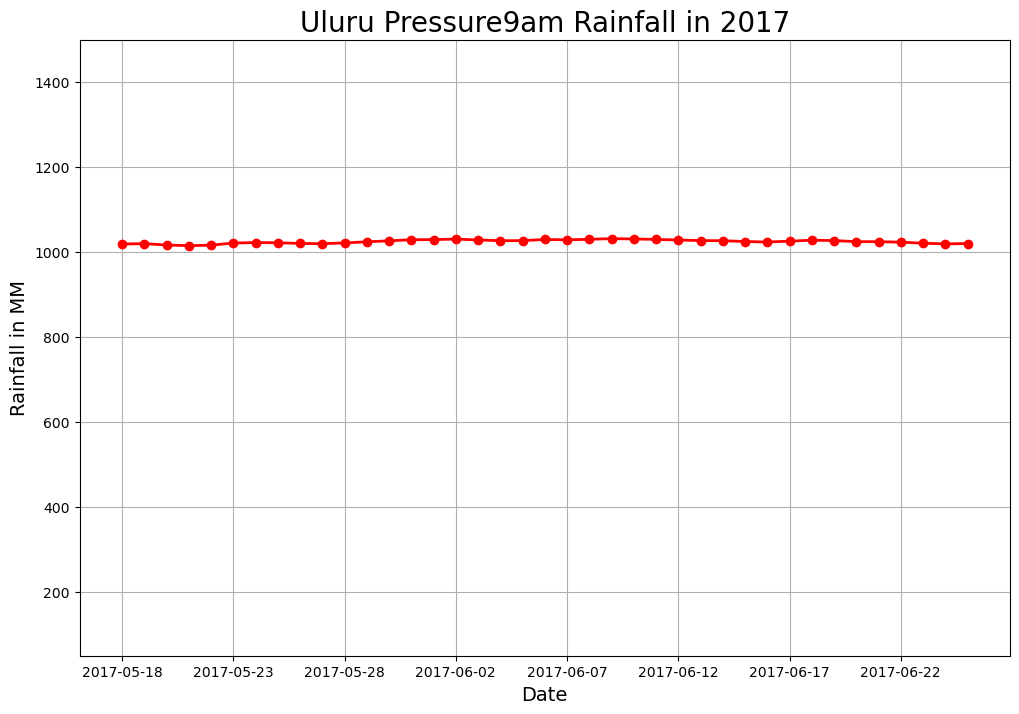

In [95]:
TN.groupby("Date").sum()['Pressure9am'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
plt.xlabel('Date',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('Uluru Pressure9am Rainfall in 2017',size=20)
plt.grid()
plt.show()

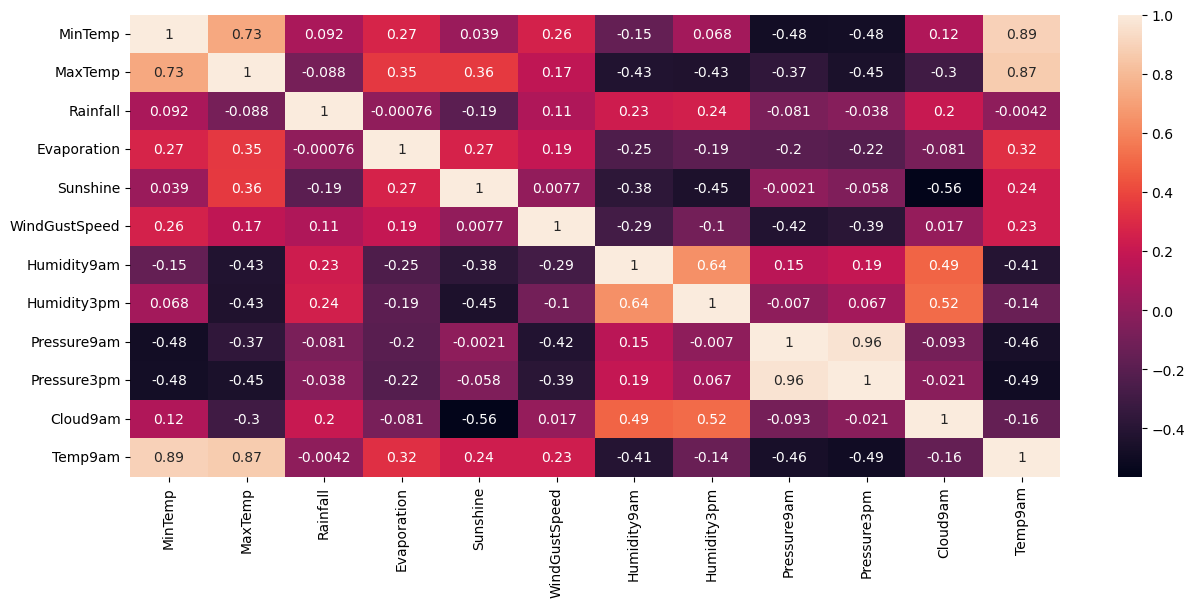

In [129]:
# correlation b/w each numeric attribute
plt.figure(figsize=(15,6))
sns.heatmap(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am','Humidity3pm', 'Pressure9am',
      'Pressure3pm', 'Cloud9am', 'Temp9am']].corr(),annot=True)
plt.show()

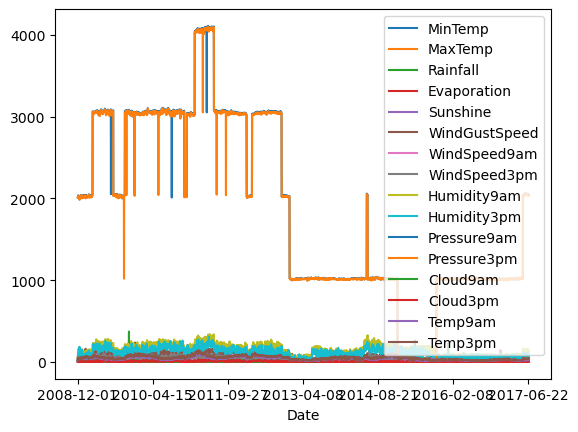

In [103]:
df.groupby("Date").sum().plot()
plt.show()

In [117]:
# Prepare data
X = df[['MaxTemp', 'MinTemp']]  # Independent variables
y = df['Rainfall']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Linear Regression Model

In [123]:
from sklearn.linear_model import LinearRegression
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 75.49929720086776
R-squared: 0.06879660344151062


# Lasso Model

In [124]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 75.4821553893647
R-squared: 0.0690080294240909


# Ridge Model

In [125]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 75.49927284212232
R-squared: 0.0687969038806846


# Svm Model

In [126]:
from sklearn.svm import SVR

svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 86.60018311309722
R-squared: -0.06812099777501501


# Random Forest Model

In [127]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 128.1171328836666
R-squared: -0.5801883424318084


# Conclusion